In [1]:
#importing common library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading csv file
raw = pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\Fraud_check (1).csv")
raw

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
#describe
raw.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
#checking null values
raw.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
#checking duplictes
raw.duplicated().sum()

0

<AxesSubplot:>

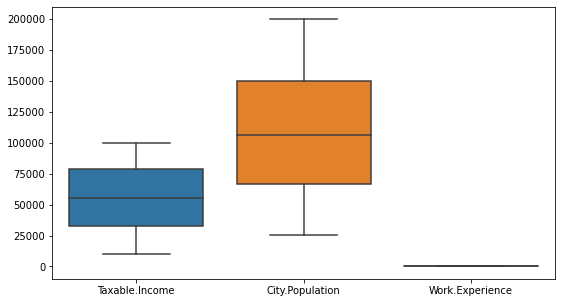

In [7]:
#checking outliers
plt.figure(figsize=(9,5))
sns.boxplot(data = raw)

There are no outliers present in the data.

In [8]:
raw.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
#changing names of columns
df = raw.rename({'Undergrad':'undergrad','Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_pop','Work.Experience':'work_exp','Urban':'urban'},axis=1)

In [10]:
df.head()

,undergrad,marital_status,taxable_income,city_pop,work_exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
df['taxable_income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: taxable_income, dtype: float64

In [12]:
#treating taxable income as taxable_income <= 30000 as "Risky" and others are "Good"
df['taxable_cat'] = pd.cut(x = df['taxable_income'], bins = [0,30000,99619], labels = ['Risky','Good'])

In [13]:
df

,undergrad,marital_status,taxable_income,city_pop,work_exp,urban,taxable_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [14]:
#dropping taxable income column
df = df.drop(['taxable_income'],axis=1)
df

,undergrad,marital_status,city_pop,work_exp,urban,taxable_cat
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [15]:
df.dtypes

undergrad           object
marital_status      object
city_pop             int64
work_exp             int64
urban               object
taxable_cat       category
dtype: object

Data Visualization

Text(0, 0.5, 'count')

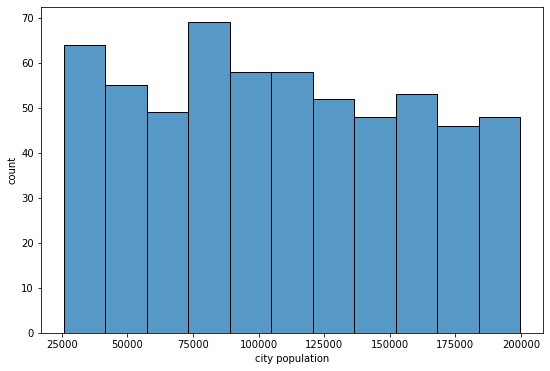

In [16]:
#city_pop
plt.figure(figsize=(9,6))
sns.histplot(df['city_pop'])
plt.xlabel('city population')
plt.ylabel('count')

Text(0, 0.5, 'count')

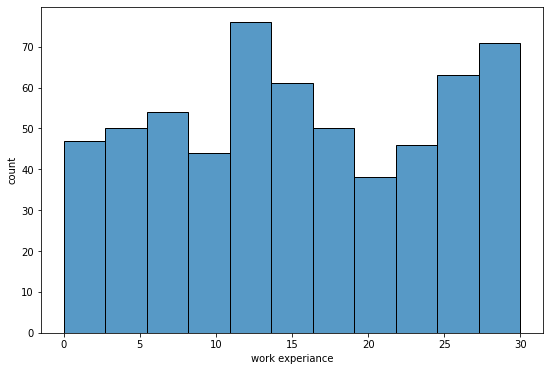

In [17]:
#work_exp
plt.figure(figsize=(9,6))
sns.histplot(df['work_exp'])
plt.xlabel('work experiance')
plt.ylabel('count')

In [18]:
#visualizing categorical feature

Text(0, 0.5, 'count')

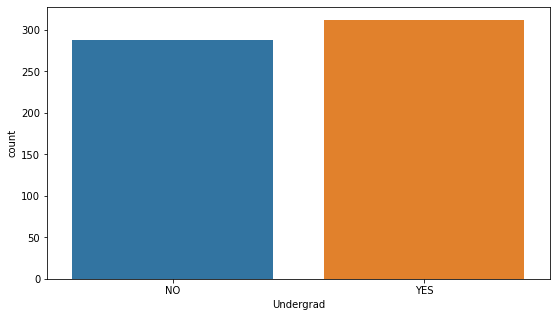

In [19]:
#undergrad
plt.figure(figsize=(9,5))
sns.countplot(df['undergrad'])
plt.xlabel('Undergrad')
plt.ylabel('count')

Text(0, 0.5, 'count')

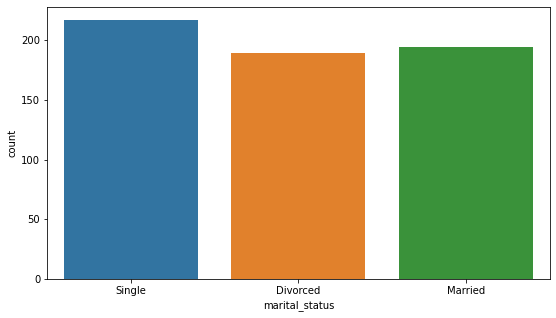

In [20]:
#marital_status
plt.figure(figsize=(9,5))
sns.countplot(df['marital_status'])
plt.xlabel('marital_status')
plt.ylabel('count')

Text(0, 0.5, 'count')

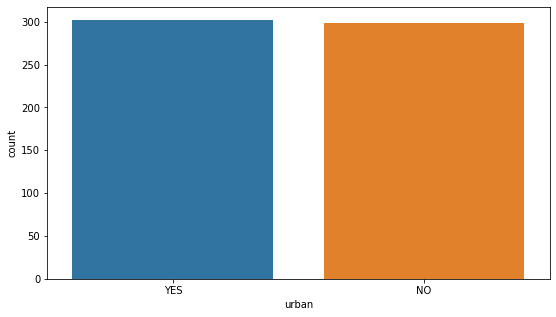

In [21]:
#urban
plt.figure(figsize=(9,5))
sns.countplot(df['urban'])
plt.xlabel('urban')
plt.ylabel('count')

In [22]:
#count of vlaues of Urban
df['urban'].value_counts()

YES    302
NO     298
Name: urban, dtype: int64

Text(0, 0.5, 'count')

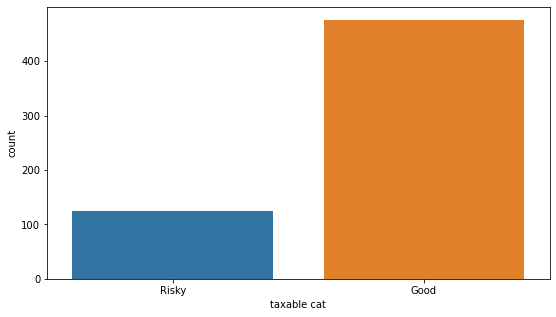

In [23]:
#taxable income
plt.figure(figsize=(9,5))
sns.countplot(df['taxable_cat'])
plt.xlabel('taxable cat')
plt.ylabel('count')

In [24]:
#values of taxable category
df['taxable_cat'].value_counts()

Good     476
Risky    124
Name: taxable_cat, dtype: int64

The target variable is unevenly distributed can be called as Imbalanced data.

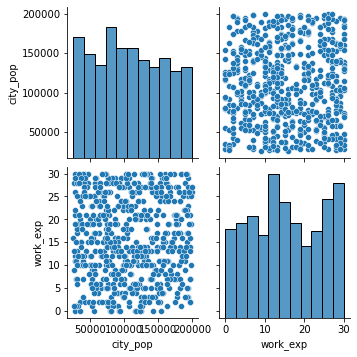

In [25]:
#mutlivariavte analysis
sns.pairplot(df);

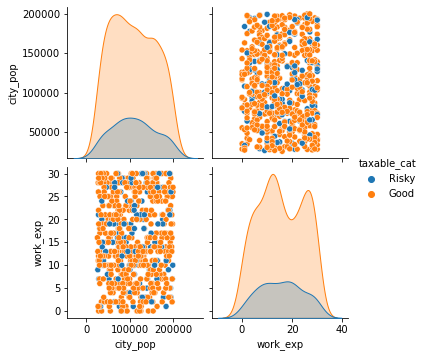

In [26]:
#mutlivariate with respect to taxable_cat
sns.pairplot(df,hue='taxable_cat')

<AxesSubplot:>

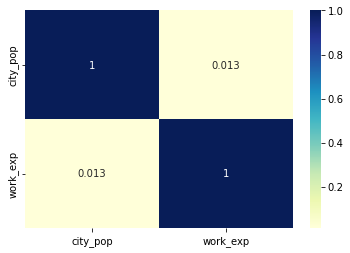

In [27]:
#correlation analysis
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [28]:
#analysing categorical variable with respect to taxable_cat

In [29]:
#taxable_cat with respect to undergrad
a_df = pd.DataFrame()
a_df['Risky'] = df[df['taxable_cat'] == 'Risky']['undergrad'].value_counts()
a_df['Good'] = df[df['taxable_cat'] == 'Good']['undergrad'].value_counts()
a_df

,Risky,Good
YES,66,246
NO,58,230


<AxesSubplot:>

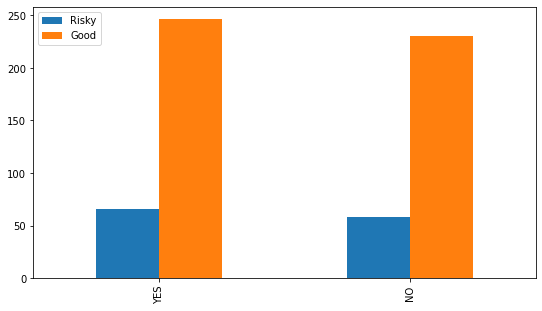

In [30]:
a_df.plot(kind='bar',figsize=(9,5))

In [31]:
#taxable income with respect to marital status
m_df = pd.DataFrame()
m_df['Risky'] = df[df['taxable_cat'] == 'Risky']['marital_status'].value_counts()
m_df['Good'] = df[df['taxable_cat'] == 'Good']['marital_status'].value_counts()
m_df

,Risky,Good
Married,45,149
Single,43,174
Divorced,36,153


<AxesSubplot:>

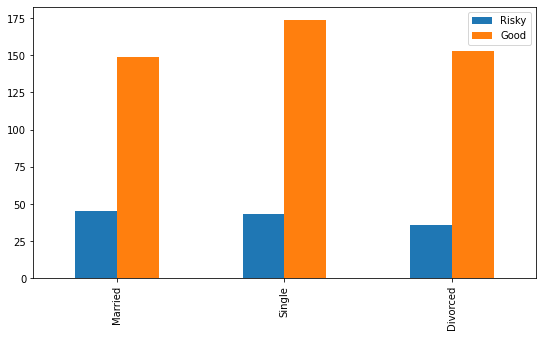

In [32]:
m_df.plot(kind='bar',figsize=(9,5))

In [33]:
#taxable income with respect to urban
u_df = pd.DataFrame()
u_df['Risky'] = df[df['taxable_cat'] == 'Risky']['urban'].value_counts()
u_df['Good'] = df[df['taxable_cat'] == 'Good']['urban'].value_counts()
u_df

,Risky,Good
YES,63,239
NO,61,237


<AxesSubplot:>

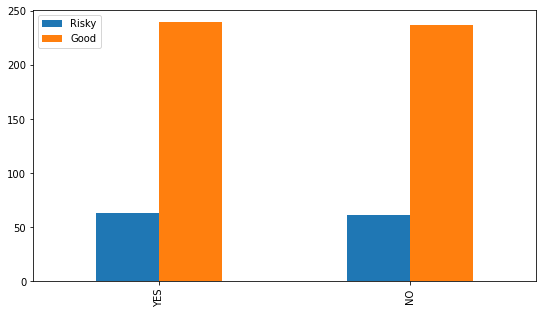

In [34]:
u_df.plot(kind='bar',figsize=(9,5))

In [35]:
#label encoding
#importing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['taxable_cat'] = le.fit_transform(df['taxable_cat'])
df

,undergrad,marital_status,city_pop,work_exp,urban,taxable_cat
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,0
596,YES,Divorced,55369,2,YES,0
597,NO,Divorced,154058,0,YES,0
598,YES,Married,180083,17,NO,0


In [36]:
#one_hot_encoding on input data
df1=pd.get_dummies(df[['undergrad','marital_status','city_pop','work_exp','urban']])

In [37]:
df1

,city_pop,work_exp,undergrad_NO,undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [38]:
df1['taxable_cat']=df['taxable_cat']
df1

,city_pop,work_exp,undergrad_NO,undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES,taxable_cat
0,50047,10,1,0,0,0,1,0,1,0
1,134075,18,0,1,1,0,0,0,1,0
2,160205,30,1,0,0,1,0,0,1,0
3,193264,15,0,1,0,0,1,0,1,0
4,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,0
596,55369,2,0,1,1,0,0,0,1,0
597,154058,0,1,0,1,0,0,0,1,0
598,180083,17,0,1,0,1,0,1,0,0


In [39]:
#define input data
X = df1.iloc[:,:9]
X.head()

,city_pop,work_exp,undergrad_NO,undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,urban_NO,urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0


In [40]:
Y = df1['taxable_cat']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: taxable_cat, dtype: int32

In [41]:
#splitting data using train_test_split
#importing library
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state=10,stratify=Y)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((402, 9), (198, 9), (402,), (198,))

Building Random Forest using "Entropy" criterion.

In [44]:
#importing necessary library
from sklearn.ensemble import RandomForestClassifier

In [45]:
#instantiating an object 
model_1 = RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap=True,max_depth=5)

In [46]:
#fitting on train data
model_1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [47]:
#predicting on test data
y_pred = model_1.predict(x_test)

In [48]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix

In [49]:
print(confusion_matrix(y_test,y_pred))

[[157   0]
 [ 41   0]]


In [50]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



from the above report we can conclude that,despite of having 79% Accuracy, model_1 is able to predict class 'Risky'.
This is because Imbalance data.

Building Random Forest model using "gini" criterion

In [51]:
#building gini model
model_2 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,bootstrap=True)

#fitting on train data
model_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [52]:
#predicting on test data
y_pred1=model_2.predict(x_test)

In [53]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [54]:
#classification report 
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



model_2 too unable to distinguish between two classes of target variable due to imbalance data.

Using Random over sampling

In [55]:
# import RadomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler

In [56]:
os = RandomOverSampler(sampling_strategy='minority')

In [57]:
X_train_res, Y_train_res = os.fit_resample(X,Y)

In [58]:
X_train_res.shape, Y_train_res.shape

((952, 9), (952,))

In [59]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Original dataset shape {}'.format(Counter(Y_train_res)))

Original dataset shape Counter({0: 476, 1: 124})
Original dataset shape Counter({0: 476, 1: 476})


In [60]:
#spliting data into training and testing data set
x_train_re,x_test_re,y_train_re,y_test_re = train_test_split(X_train_res,Y_train_res,test_size=0.33,random_state=70)

In [61]:
#building model using random over samples and gini criterion
model_gini =  RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,bootstrap=True)

#fitting on train data
model_gini.fit(x_train_re,y_train_re)

RandomForestClassifier(max_depth=5)

In [62]:
#predicting on test data
pred_1 = model_gini.predict(x_test_re)

In [63]:
#classification report 
print(classification_report(y_test_re,pred_1))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       159
           1       0.68      0.64      0.66       156

    accuracy                           0.67       315
   macro avg       0.67      0.67      0.67       315
weighted avg       0.67      0.67      0.67       315



In [64]:
#To identify false prediction
print(confusion_matrix(y_test_re,pred_1))

[[111  48]
 [ 56 100]]


#Using SMOTE

In [65]:
#importing necessary library for SMOTE
from imblearn.over_sampling import SMOTE

In [66]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(X,Y)

In [67]:
#splitting data using train_test_split
x_train_sm,x_test_sm,y_train_sm,y_test_sm=train_test_split(x_res,y_res,test_size=0.33,random_state=0)

In [68]:
#building model using SMOTE over samples and gini criterion
model_gini_sm =  RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,bootstrap=True)

#fitting on train data
model_gini_sm.fit(x_train_sm,y_train_sm)

RandomForestClassifier(max_depth=5)

In [69]:
#prediting on test data
pred_3 = model_gini_sm.predict(x_test_sm)

In [70]:
#classification report
print(classification_report(y_test_sm,pred_3))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       163
           1       0.93      0.66      0.77       152

    accuracy                           0.81       315
   macro avg       0.84      0.81      0.81       315
weighted avg       0.84      0.81      0.81       315



In [71]:
#confusion_matrix
print(confusion_matrix(y_test_sm,pred_3))

[[156   7]
 [ 52 100]]


Using SMOTE resampling 'model_gini_sm' is 81% accurately able to distinguish between Risky and Good.